**DECISION TREE**


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
#importando o banco pelo collab
from google.colab import files
uploaded = files.upload()

Saving data8.dta to data8.dta


In [ ]:
import pandas as pd
# Substitua 'data.dta' pelo nome real do seu arquivo
df = pd.read_stata('data8.dta')

# Visualizar as primeiras linhas do dataframe
df.head()

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,sexo,corpele,idade,trabalha,cafedamanha,...,bullying,motivo_bullying,sozinho,insonia,amigos,imagem_imp,satisf_corp,imagem_corp,imc_cat_recoded,quintil_socioecon
0,0.0,15.0,0.0,15.0,60.0,Feminino,Branca,13 anos,Não,"Sim, todos os dias",...,Nunca,NaN,Nunca,Nunca,3 ou mais amigos,Muito importante,Satisfeito,Muito magro,Déficit de peso e Eutrofia,5.0
1,120.0,510.0,260.0,130.0,300.0,Feminino,Branca,14 anos,Não,Raramente,...,Nunca,NaN,Na maior parte do tempo,Na maior parte do tempo,3 ou mais amigos,Pouco importante,Satisfeito,Normal,Déficit de peso e Eutrofia,4.0
2,0.0,585.0,130.0,455.0,420.0,Masculino,Parda,13 anos,Não,Raramente,...,Raramente,Outros motivos/causas,Nunca,Raramente,2 amigos,Muito importante,Satisfeito,Normal,Déficit de peso e Eutrofia,5.0
3,0.0,0.0,0.0,0.0,0.0,Masculino,Branca,14 anos,Não,"Sim, todos os dias",...,Nunca,NaN,Raramente,Raramente,3 ou mais amigos,Muito importante,Satisfeito,Normal,Sobrepeso e Obesidade,5.0
4,30.0,165.0,90.0,45.0,60.0,Masculino,Branca,13 anos,Não,"Sim, todos os dias",...,Raramente,Aparência do corpo,Raramente,Raramente,3 ou mais amigos,Muito importante,Insatisfeito,Gordo,Sobrepeso e Obesidade,5.0


In [ ]:
!pip install pandas scikit-learn

In [ ]:
# Verificando a presença de valores nulos
null_counts = df.isnull().sum()
print("Valores nulos em cada coluna:")
print(null_counts[null_counts > 0])

Valores nulos em cada coluna:
TEMPODESLOC            33
TEMPOTOTAL             20
TEMPOEDFIS             84
TEMPOEXTRA             93
TEMPOEST              110
corpele                23
trabalha               14
cafedamanha            12
almojanta              25
comer_tvestuda         15
merenda              1135
comemerenda          5445
feijao_7               36
salgado_7              37
legumeverdura_7        34
guloseima_7            39
frutas_7               37
refrigerante_7         29
aup_7                  50
fastfood_7             37
ficoucfome             30
frutas_30              46
legumeverdura_30       59
refrigerante_30        40
tempo_tv               50
tempo_telas            84
tabagismo            4729
alcool               4743
drogas               4741
bullying              103
motivo_bullying      9329
sozinho                66
insonia                77
amigos                 67
imagem_imp            155
satisf_corp           181
imagem_corp           159
quintil_

In [ ]:
df['quintil_socioecon'] = df['quintil_socioecon'].astype('category')

In [ ]:
# Identifica colunas categóricas e contínuas
categorical_cols = df.select_dtypes(include=['category', 'object']).columns
continuous_cols = df.select_dtypes(include=['float64']).columns

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Tratamento de valores nulos
# variáveis contínuas: substituir nulos pela mediana
imputer_cont = SimpleImputer(strategy='median')
df[continuous_cols] = imputer_cont.fit_transform(df[continuous_cols])

In [ ]:
#  variáveis categóricas: substituir nulos pela moda
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder # Import OneHotEncoder

# Tratamento de valores nulos
# ... (rest of your code)

# Codificação de variáveis categóricas
# Usar OneHotEncoder para variáveis categóricas
ohe = OneHotEncoder(sparse=False, drop='first')
transformed_df = ohe.fit_transform(df[categorical_cols])
ohe_df = pd.DataFrame(transformed_df, columns=[f"{col}_{cat}" for col, categories in zip(categorical_cols, ohe.categories_) for cat in categories[1:]])
df = pd.concat([df.drop(categorical_cols, axis=1), ohe_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df.head()

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,sexo_Masculino,corpele_Branca,corpele_Indígena,corpele_Parda,corpele_Preta,...,satisf_corp_Satisfeito,imagem_corp_Magro,imagem_corp_Muito gordo,imagem_corp_Muito magro,imagem_corp_Normal,imc_cat_recoded_Sobrepeso e Obesidade,quintil_socioecon_2.0,quintil_socioecon_3.0,quintil_socioecon_4.0,quintil_socioecon_5.0
0,0.0,15.0,0.0,15.0,60.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,120.0,510.0,260.0,130.0,300.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,585.0,130.0,455.0,420.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,30.0,165.0,90.0,45.0,60.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


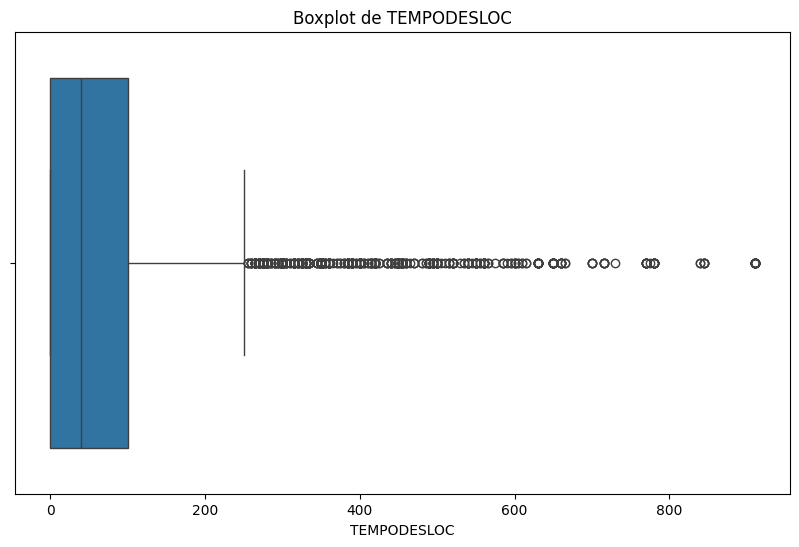

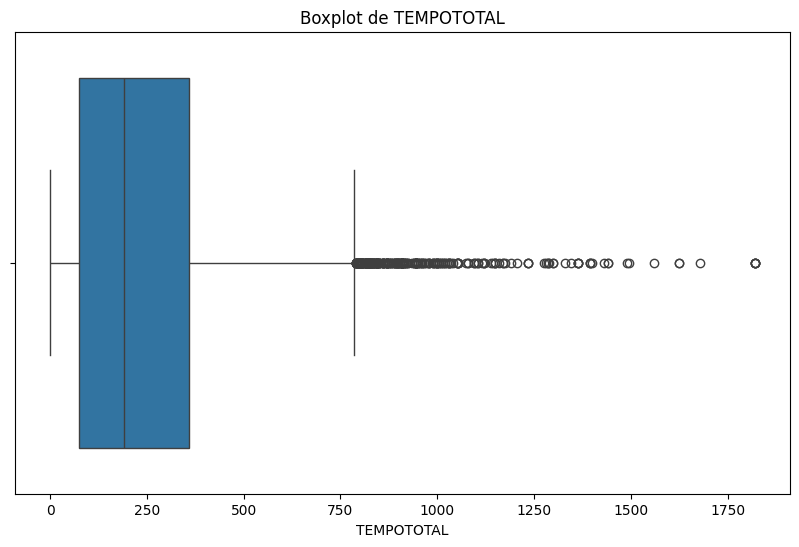

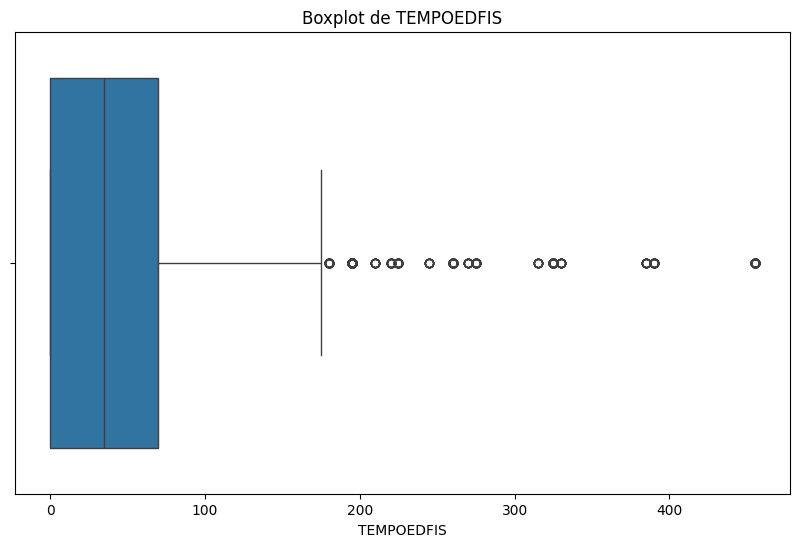

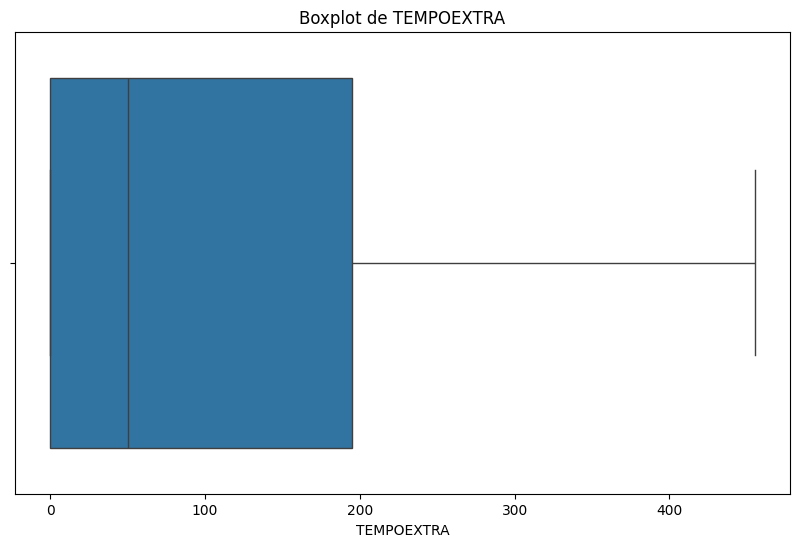

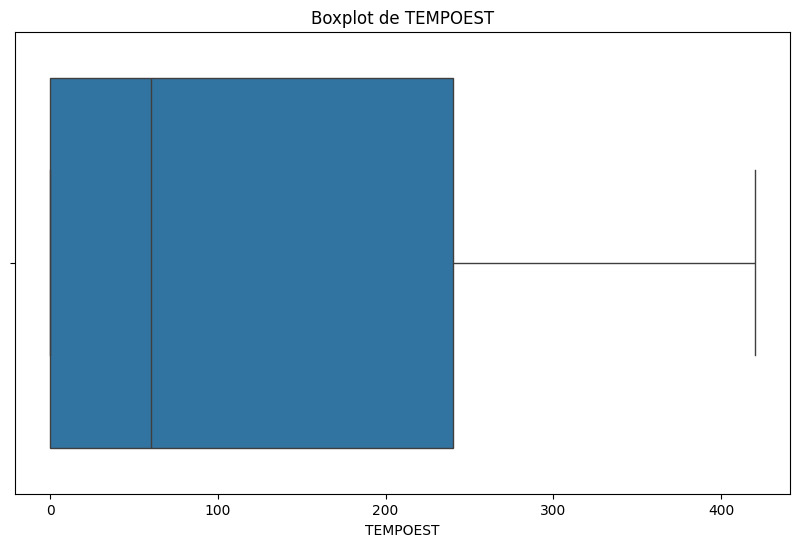

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# múltiplas colunas
features = ['TEMPODESLOC', 'TEMPOTOTAL', 'TEMPOEDFIS', 'TEMPOEXTRA', 'TEMPOEST']

#boxplots para cada coluna
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot de {feature}')
    plt.show()

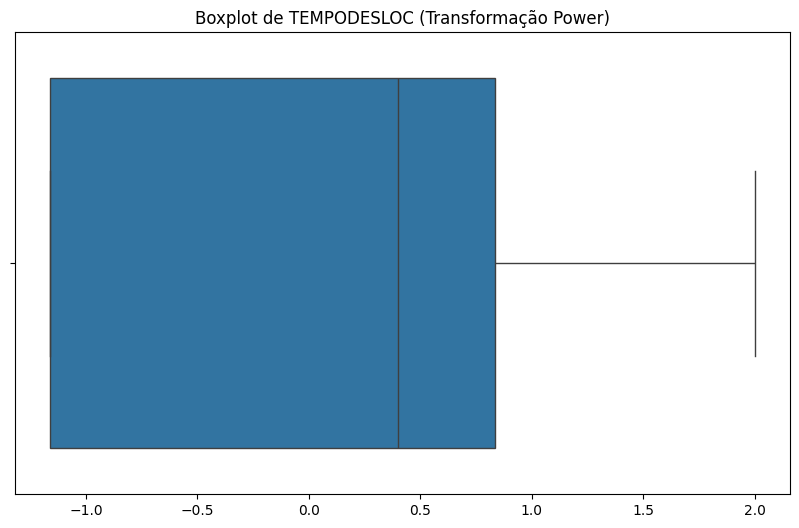

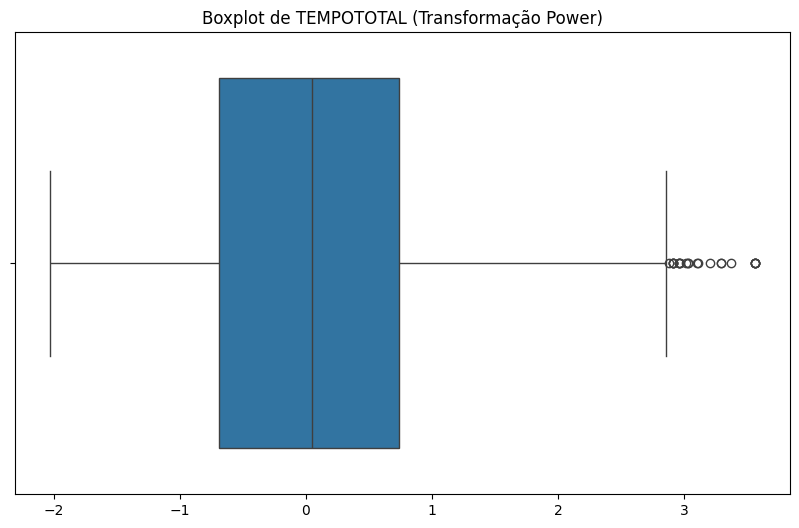

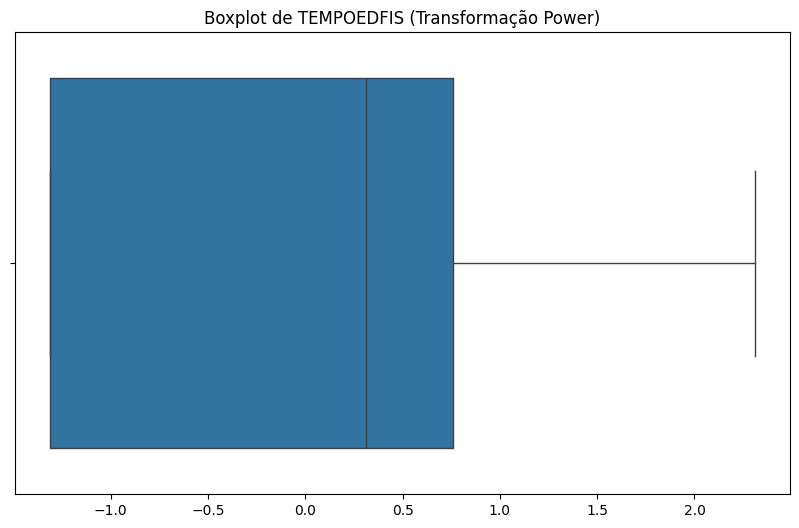

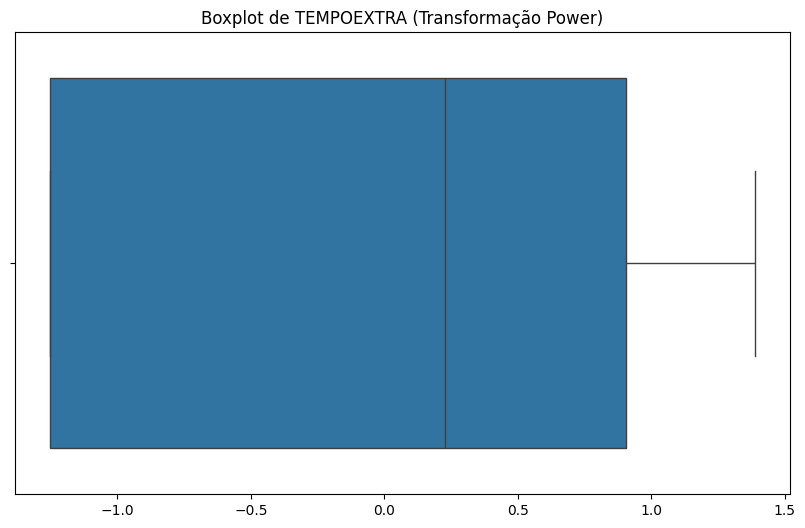

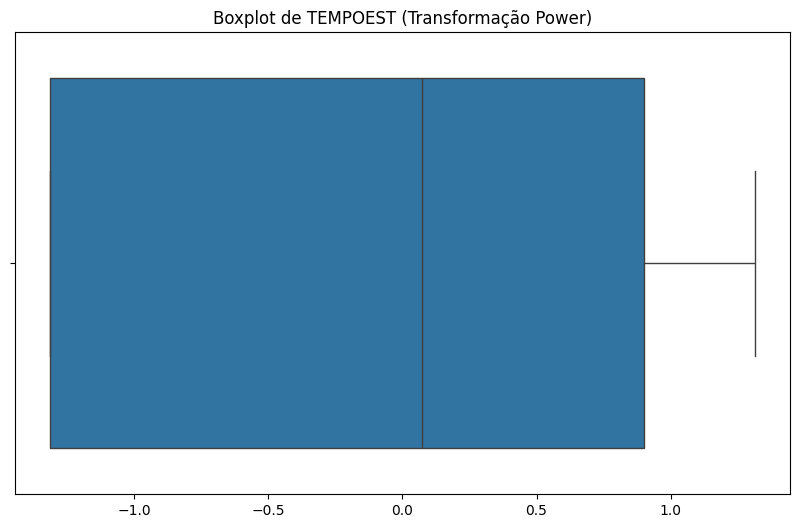

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Aplicando a transformação Power (Box-Cox ou Yeo-Johnson) e criando boxplots para cada coluna
pt = PowerTransformer(method='yeo-johnson')  # 'box-cox' se os dados forem estritamente positivos

for feature in features:
    plt.figure(figsize=(10, 6))

    # A transformação Power é aplicada à coluna
    transformed_data = pt.fit_transform(df[[feature]])

    sns.boxplot(x=transformed_data.flatten())
    plt.title(f'Boxplot de {feature} (Transformação Power)')
    plt.show()

In [ ]:
df.head()

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,sexo_Masculino,corpele_Branca,corpele_Indígena,corpele_Parda,corpele_Preta,...,satisf_corp_Satisfeito,imagem_corp_Magro,imagem_corp_Muito gordo,imagem_corp_Muito magro,imagem_corp_Normal,imc_cat_recoded_Sobrepeso e Obesidade,quintil_socioecon_2.0,quintil_socioecon_3.0,quintil_socioecon_4.0,quintil_socioecon_5.0
0,0.0,15.0,0.0,15.0,60.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,120.0,510.0,260.0,130.0,300.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,585.0,130.0,455.0,420.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,30.0,165.0,90.0,45.0,60.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Normalização das variáveis contínuas
scaler = StandardScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

In [ ]:
# Verifica a presença de valores nulos
null_counts = df.isnull().sum()
print("Valores nulos em cada coluna:")
print(null_counts[null_counts > 0])

Valores nulos em cada coluna:
Series([], dtype: int64)


In [ ]:
# Mostrar os nomes das colunas no DataFrame
print(df.columns.tolist())

['TEMPODESLOC', 'TEMPOTOTAL', 'TEMPOEDFIS', 'TEMPOEXTRA', 'TEMPOEST', 'sexo_Masculino', 'corpele_Branca', 'corpele_Indígena', 'corpele_Parda', 'corpele_Preta', 'idade_12 anos', 'idade_13 anos', 'idade_14 anos', 'idade_15 anos', 'idade_16 anos', 'idade_17 anos', 'idade_18 anos', 'idade_19 anos ou mais', 'trabalha_Sim', 'cafedamanha_Raramente', 'cafedamanha_Sim, 1 a 2 dias por semana', 'cafedamanha_Sim, 3 a 4 dias por semana', 'cafedamanha_Sim, 5 a 6 dias por semana', 'cafedamanha_Sim, todos os dias', 'almojanta_Raramente', 'almojanta_Sim, 1 a 2 dias por semana', 'almojanta_Sim, 3 a 4 dias por semana', 'almojanta_Sim, 5 a 6 dias por semana', 'almojanta_Sim, todos os dias', 'comer_tvestuda_Raramente', 'comer_tvestuda_Sim, 1 a 2 dias por semana', 'comer_tvestuda_Sim, 3 a 4 dias por semana', 'comer_tvestuda_Sim, 5 a 6 dias por semana', 'comer_tvestuda_Sim, todos os dias', 'merenda_Sim', 'comemerenda_Raramente', 'comemerenda_Sim, 1 a 2 dias por semana', 'comemerenda_Sim, 3 a 4 dias por seman

In [ ]:
# Separar as variáveis independentes (X) da variável dependente (y)
X = df.drop('imc_cat_recoded_Sobrepeso e Obesidade', axis=1)
y = df['imc_cat_recoded_Sobrepeso e Obesidade']

In [ ]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

BALANCEAMENTO DOS DADOS

In [ ]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para balancear as classes no conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
# Verificar o balanceamento
print("Distribuição das classes após SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

Distribuição das classes após SMOTE:
imc_cat_recoded_Sobrepeso e Obesidade
1.0    9611
0.0    9611
Name: count, dtype: int64


In [ ]:
df.head()

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,sexo_Masculino,corpele_Branca,corpele_Indígena,corpele_Parda,corpele_Preta,...,satisf_corp_Satisfeito,imagem_corp_Magro,imagem_corp_Muito gordo,imagem_corp_Muito magro,imagem_corp_Normal,imc_cat_recoded_Sobrepeso e Obesidade,quintil_socioecon_2.0,quintil_socioecon_3.0,quintil_socioecon_4.0,quintil_socioecon_5.0
0,-0.662734,-1.077921,-0.798740,-0.702443,-0.523275,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.391249,1.276770,3.402980,0.089315,1.205331,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.662734,1.633541,1.302120,2.326892,2.069635,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.662734,-1.149275,-0.798740,-0.805716,-0.955427,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,-0.399238,-0.364378,0.655701,-0.495898,-0.523275,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# **AJUSTE HIPERPARAMETROS**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score


In [ ]:
#Fazer os K-folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)
clf = DecisionTreeClassifier(random_state=42)


In [ ]:
scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')


In [ ]:
print("Pontuações para cada fold:", scores)
print("Acurácia média:", scores.mean())
print("Desvio padrão da acurácia:", scores.std())


Pontuações para cada fold: [0.69202899 0.69806763 0.70531401 0.71256039 0.68055556 0.71014493
 0.69728097 0.69848943 0.70392749 0.70513595]
Acurácia média: 0.7003505334442547
Desvio padrão da acurácia: 0.0088573615223919


In [ ]:
#Treinamento do Modelo
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

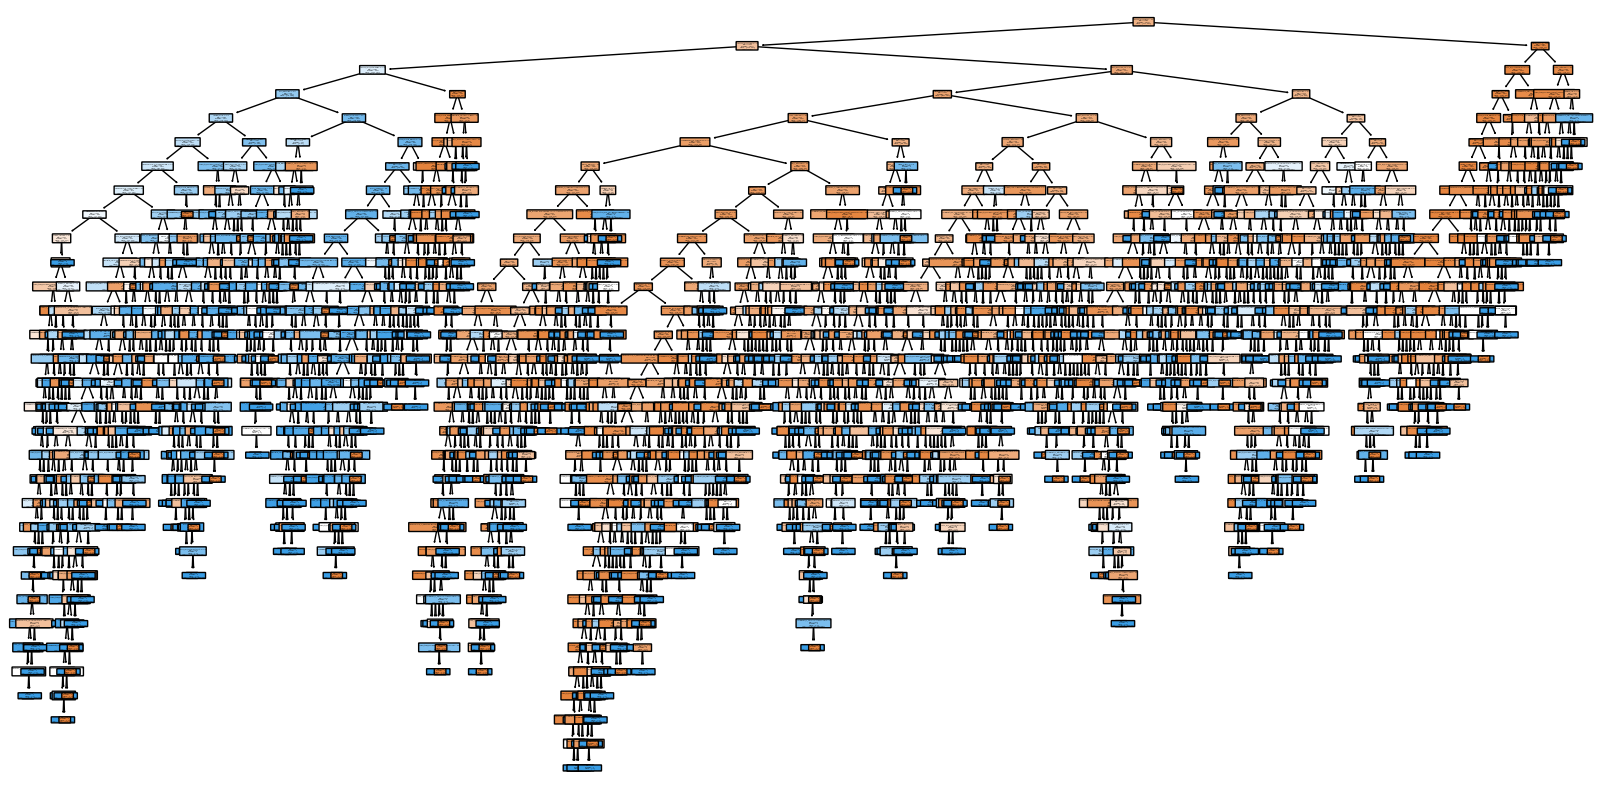

In [ ]:
!pip install scikit-learn
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree # Import the plot_tree function

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['Normal', 'Sobrepeso e Obesidade'], filled=True, rounded=True)
plt.show()

In [ ]:
# Treinar o modelo
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Fazer previsões
y_pred = clf.predict(X_test)

In [ ]:
# Obter as previsões de probabilidade para o conjunto de teste
y_pred_prob = clf.predict_proba(X_test)[:, 1]


In [ ]:
# Fazer previsões no conjunto de treinamento
y_train_pred = clf.predict(X_train)

AVALIAÇÃO DO MODELO

In [ ]:
# Avaliar o modelo no conjunto de treinamento
print("Acurácia no Treinamento:", accuracy_score(y_train, y_train_pred))
print("\nMatriz de Confusão no Treinamento:")
print(confusion_matrix(y_train, y_train_pred))
print("\nRelatório de Classificação no Treinamento:")
print(classification_report(y_train, y_train_pred))


Acurácia no Treinamento: 1.0

Matriz de Confusão no Treinamento:
[[9611    0]
 [   0 3633]]

Relatório de Classificação no Treinamento:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9611
         1.0       1.00      1.00      1.00      3633

    accuracy                           1.00     13244
   macro avg       1.00      1.00      1.00     13244
weighted avg       1.00      1.00      1.00     13244



In [ ]:
# Fazer previsões
y_pred = clf.predict(X_test)

In [ ]:
# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Acurácia: 0.7122584541062802

Matriz de Confusão:
[[1902  501]
 [ 452  457]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80      2403
         1.0       0.48      0.50      0.49       909

    accuracy                           0.71      3312
   macro avg       0.64      0.65      0.64      3312
weighted avg       0.72      0.71      0.71      3312



In [ ]:
# Obter as previsões de probabilidade para a curva ROC
y_pred_prob = clf.predict_proba(X_test)[:, 1]


In [ ]:
# Calcular a AUC-ROC
from sklearn.metrics import roc_curve, auc # Import the auc function
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print("\nAUC-ROC:", roc_auc)



AUC-ROC: 0.6471304433814168


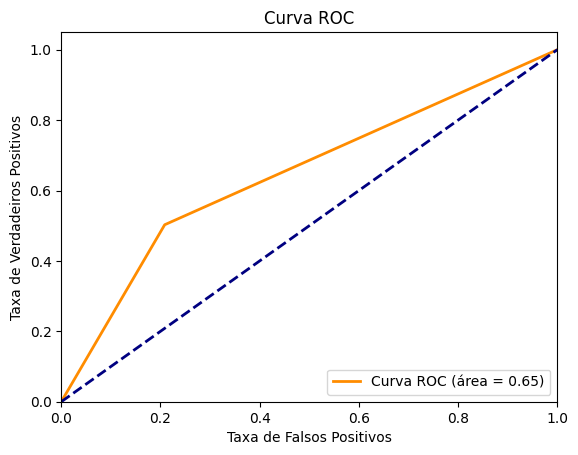

In [ ]:
# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Imprimir a AUC
print('AUC:', roc_auc)

AUC: 0.6471304433814168
